$$m\ddot{x}+r\dot{x}+k(x)x=F_{0}$$
$$F_{0}=\left\{
\begin{array}{ll}
      PA & \dot{x}\geq 0 \\
      \frac{-PA}{2} & \dot{x} < 0 \\
\end{array} 
\right. $$
$$k(x)=k(1+ \eta x^{2})$$

In [25]:
import numpy as np
# Make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.io.wavfile import write
import scipy.fftpack as syfp
from scipy.fft import fft

In [26]:
m=1.25e-4
r=0.06
k=80
eta=1e6
P=784
A=3.6e-5

time_duration = 10

In [27]:
SAMPLING_RATE = 44100 #bits

$$y=\dot{x}$$
$$\ddot{x}=\dot{x}=0$$

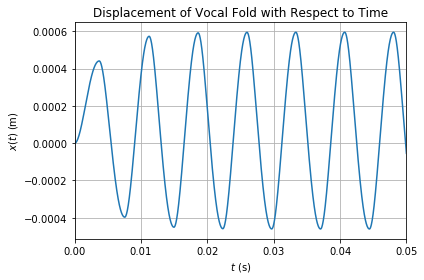

In [28]:
X0 = [0,0]
ts = np.linspace(0,time_duration,int(SAMPLING_RATE*time_duration))

def d2x_dt2(X, t, m, r, k, P, A,eta):
    # Here X is a vector such that x=X[0] and y=X[1]. This function should return [x', y']
    if X[1] >= 0:
        F = P*A
    else:
        F = -1*P*A/2
    return [X[1],(F-r*X[1]-k*(1+eta*X[0]**2)*X[0])/m]


Xs = odeint(d2x_dt2, X0, ts, args=(m,r,k,P,A,eta))

xs = Xs[:,0]

plt.plot(ts,xs)
plt.xlim(0,0.05)
plt.grid()
plt.xlabel('$t$ (s)')
plt.ylabel('$x(t)$ (m)')
plt.title('Displacement of Vocal Fold with Respect to Time')
plt.tight_layout()
plt.savefig('model_2_plot.pdf')

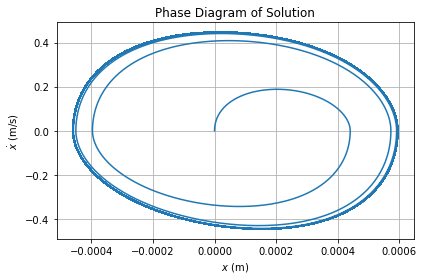

In [29]:
plt.plot(Xs[:,0],Xs[:,1])
plt.grid()
plt.title('Phase Diagram of Solution')
plt.ylabel('$\dot{x}$ (m/s)')
plt.xlabel('$x$ (m)')
plt.tight_layout()
plt.savefig('model_2_phase_diagram.pdf')

In [30]:
m = np.max(np.abs(xs))
sigf32 = (xs/m).astype(np.float32)
write('test.wav',SAMPLING_RATE,sigf32)